In [1]:
from scipy import signal
from skimage.feature import peak_local_max
import numpy as np

In [2]:
from bokeh.plotting import figure, show, output_notebook, gridplot
from bokeh.palettes import Blues9, Reds3

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import duplicate_audio.wavBasicRead as wbr

In [97]:
# WAV_FILE_PATH = "./resources/4-free-drum-loops-127-bpm/01-drum-loop-127-bpm.wav"
WAV_FILE_PATH = "./resources/4-free-drum-loops-127-bpm/02-drum-loop-127-bpm.wav"

## Read a wav file into a numpy array

In [98]:
wav_dict = wbr.read_single_wav(WAV_FILE_PATH)
wav_dict

{'abs_file_path': '/Users/myrmidon/Delve/studies-mi/mmar/duplicate_audio/resources/4-free-drum-loops-127-bpm/02-drum-loop-127-bpm.wav',
 'data': array([[  0,   0],
        [  0,   0],
        [  0,   0],
        ..., 
        [299, 253],
        [381, 415],
        [  0,   0]], dtype=int16),
 'sampling_frequency': 44100}

In [99]:
wav_dict["n_samples"], wav_dict["n_channels"] = wav_dict["data"].shape
wav_dict

{'abs_file_path': '/Users/myrmidon/Delve/studies-mi/mmar/duplicate_audio/resources/4-free-drum-loops-127-bpm/02-drum-loop-127-bpm.wav',
 'data': array([[  0,   0],
        [  0,   0],
        [  0,   0],
        ..., 
        [299, 253],
        [381, 415],
        [  0,   0]], dtype=int16),
 'n_channels': 2,
 'n_samples': 166678,
 'sampling_frequency': 44100}

### Plotting the amplitude

In [ ]:
# x = np.arange(2001)
# y = [wav_dict["data"][0::wav_dict["n_samples"]//2000, c] for c in range(wav_dict["n_channels"])]

In [ ]:
# output_notebook()

In [ ]:
# pp = []
# for i, yy in enumerate(y):
#     p = figure(title=("Channel :%d")%i, width=250, height=250)
#     p.line(x, yy)
#     pp.append(p)

# ppp = gridplot([pp])
# show(ppp)

## Spectogram

For now, let's stick to the first channel

In [100]:
[spec_f, spec_t, spec] = signal.spectrogram(wav_dict["data"][:, 0],
                                           fs=wav_dict["sampling_frequency"],
                                           scaling='spectrum')

In [101]:
spec.shape

(129, 743)

In [ ]:
# output_notebook()

# im_data = np.log(spec[:, 0:5000])
# s = figure(title="Spectogram", x_range=(0, im_data.shape[1]), y_range=(0, im_data.shape[0]), webgl=True)
# s.image(image=[im_data], x=[0], y=[0], dw=[im_data.shape[1]], dh=[im_data.shape[0]], palette=Blues9 )

# show(s)

## Find local maxima

In [102]:
local_max = peak_local_max(spec, min_distance=2, exclude_border=True, threshold_rel=0)

In [103]:
local_max.shape

(2357, 2)

## Define Target Zone

In [104]:
TGT_HEIGHT_Minus, TGT_HEIGHT_Plus, TGT_WIDTH, TGT_DISP = [-25, 25, 25, 50]

In [105]:
lomx = np.zeros(spec.shape)
lomx[local_max[:, 0], local_max[:, 1]] = 1
lomx.shape

(129, 743)

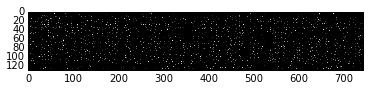

In [106]:
plt.imshow(lomx*255, cmap=plt.cm.gray)

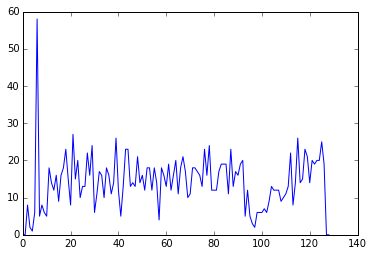

In [26]:
plt.plot(np.sum(lomx, axis=1))

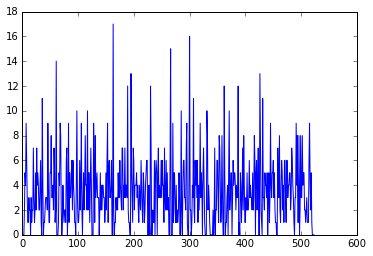

In [27]:
plt.plot(np.sum(lomx, axis=0))

In [36]:
# Pad with zeros
lomx_p = np.pad(lomx, 25, mode='constant', constant_values=0)
lomx_p.shape

(179, 574)

In [49]:
tgt_Y, tgt_X = np.ogrid[TGT_HEIGHT_Minus : TGT_HEIGHT_Plus, TGT_DISP : TGT_DISP+TGT_WIDTH]

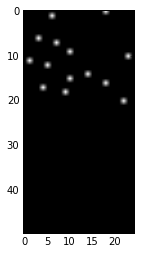

In [55]:
for time in [26]:
    for freq in range(26, lomx_p.shape[0] - 24):
        tgt_Y_zone = tgt_Y + freq
        tgt_X_zone = tgt_X + time
        
        tgt_zone = lomx_p[tgt_Y_zone, tgt_X_zone]
        
        
        

****
### Experiment with GLCM

In [107]:
lmx = np.zeros(spec.shape)
lmx[local_max[:, 0], local_max[:, 1]] = 1

In [108]:
from skimage.feature import greycomatrix, greycoprops

In [109]:
glcm = lambda t1, t2: greycomatrix(lmx[:, t1:t2], list(range(25, 51)), [0], levels=2)
res = list(map(glcm, list(range(0,lmx.shape[1],50)), list(range(100,lmx.shape[1],50))))
print(len(res))
print(res[0].shape)

13
(2, 2, 26, 1)


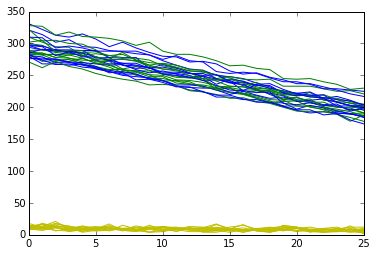

In [96]:
colors = [['r', 'g'], ['b', 'y']]
for k in range(len(res)):
    for i in range(2):
        for j in range(2):
            if i == j == 0:
                continue
            plt.plot(res[k][i, j, :, 0], colors[i][j])

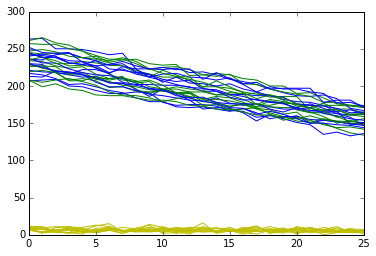

In [110]:
colors = [['r', 'g'], ['b', 'y']]
for k in range(len(res)):
    for i in range(2):
        for j in range(2):
            if i == j == 0:
                continue
            plt.plot(res[k][i, j, :, 0], colors[i][j])